# Before your start:
- Read the README.md file
- Comment as much as you can and use the resources (README.md file)
- Happy learning!

In [1]:
import pandas as pd
import numpy as np
from scipy import stats 
import matplotlib.pyplot as plt


# Challenge 1 - Generate and Plot Normal Distributions

#### Step 1: Generate samples and test normal distribution

Use mean=50, standard_deviation=5, and sample_size=[10, 50, 500, 5000] to generate 4 random samples that are normally distributed. Test your normal distributions with [`scipy.stats.normaltest`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.normaltest.html).


*Hint: Read the documentation for `scipy.stats.normaltest`. The function does not simply return Yes or No for whether your data is normal distribution. It returns the likelihood.*

In [2]:
# Your code here
mu, sigma = 50, 5 #mean,  

sample_size = pd.Series([10, 50, 500, 5000, 50000])

dists = sample_size.apply(lambda s: np.random.normal(mu, sigma, s))

tests = dists.apply(lambda d: stats.normaltest(d))

tests

/usr/local/lib/python3.7/site-packages/scipy/stats/stats.py:1450: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))


0     (0.9671683506722635, 0.6165695334331032)
1     (0.9762338673028921, 0.6137810971815101)
2     (3.031258761633547, 0.21966988531894924)
3    (0.26970333814969294, 0.8738455203897881)
4     (0.2654293761960949, 0.8757149083553734)
dtype: object

#### Interpret the normaltest results and make your observations.

In [3]:
# These tuples enclose the value representing the skewness and the kurtosis values for different samples. 
# The closer to 0, the more similar to a normal distribution. 
# Skewness indicates asymetry in the model showing the median is higher/smaller than the mean. 
# On the other hand, kurtosis shows how values' concentration are away from the mean. 

#### Step 2: Plot normal distributions

Use matplotlib subplots to plot a histogram of each sample. 

*Hints:*
- Use subplots to compare your figures side by side.

- Your output should look like below:

![normal distributions with different sample sizes](ch-1.png)

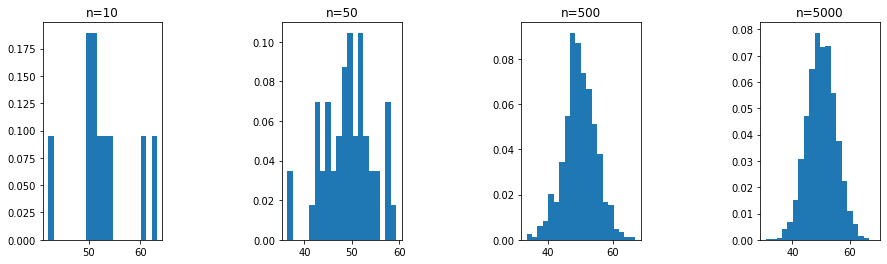

In [4]:
# Your code here
f, ax = plt.subplots(1, 4)

f.set_figwidth(15)

f.subplots_adjust(wspace=1)

for i in range(0, 4):
    ax[i].set_title('n=%s' % (sample_size[i]))
    count, bins, ignored = ax[i].hist(dists[i], 20, density=True)

#### Compare the distributions above. What do you observe? Explain with the Central Limit Theorem.

In [5]:
#The larger the sample, the more normal shape tends to have. 


# Challenge 2 - Plot Probability Mass Function (PMF)

#### Background knowledge

[PMF](https://en.wikipedia.org/wiki/Probability_mass_function) shows the probability distribution of a **discrete random variable**. A [discrete random variable](https://en.wikipedia.org/wiki/Random_variable#Discrete_random_variable) has random numeric values that are not continuous. For example, the number of people in a household can only be integers but not floats. Therefore the number of people in a household is a discrete variable.

#### Question: We assume that the probability of clicking an Ad in a Youtube video is 0.15. We have a sample of 5 people who wathched the video and we want to plot the PMF for a binomial distribution.

*Hint: use binom from `scipy.stats.binom`. Your output should look like below:*

![binom 10](ch-2.png)

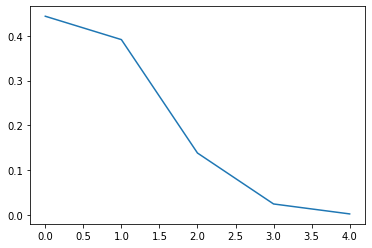

In [6]:
# Your code here
from scipy.stats import binom

n, p = 5, 0.15

x = range(n)

dist = binom(n, p)

fig, ax = plt.subplots(1, 1)

plt.plot(x, dist.pmf(x))

plt.show()

#### Explain what you observe from the plot above

In [8]:
#It is following a binomial (yes/no events) distribution in which the probability of clicks decreases as the number of consecutive clicks increases.
#So, the probability of reaching 4 consecutive clicks is close to 0 meanwhile the probability of reaching 1 click out of 5 trials is close to 0.4


#### Now plot PMP with 50, 500, and 5000 visitors.

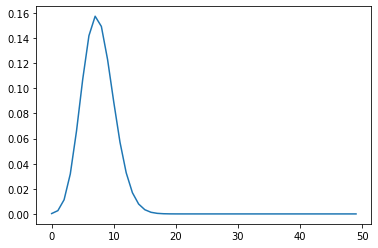

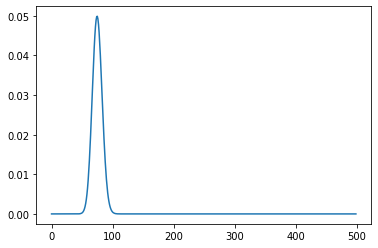

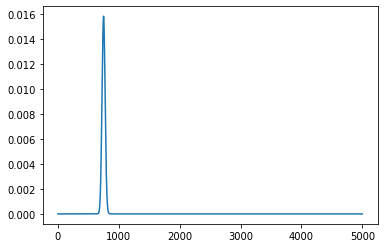

In [33]:
# Your code here
from scipy.stats import binom

n, p = 50, 0.15
x = range(n)
dist = binom(n, p)
fig, ax = plt.subplots(1, 1)
plt.plot(x, dist.pmf(x))
plt.show()


n, p = 500, 0.15
x = range(n)
dist = binom(n, p)
fig, ax = plt.subplots(1, 1)
plt.plot(x, dist.pmf(x))
plt.show()

n, p = 5000, 0.15
x = range(n)
dist = binom(n, p)
fig, ax = plt.subplots(1, 1)
plt.plot(x, dist.pmf(x))
plt.show()

#### What did you notice from the distribution plots? Comment your findings.

In [ ]:
#All these samples are showing a normal distribution shape function skewed to the right and low kurtosis. This is showing that successes in the sample distribution are located along the first attempts. 
#Moreover the probability decreases with the increasing size of the sample, meaning that the more people who views the video the less probability that noone clicks on the ad. 
#The larger the consecutive clicks the lower the probability. 


# Challenge 3

Research about the poisson distribution

In [ ]:
#Is a discrete probability distribution showing the probability of an event ocurring within an interval and following an independent behaviour. Meaning, that the occurrence of an event will not affect future events in the delimited interval.
#Important to remark that the event must occur within the determined interval.

#### A website has an average of 300 visits per day. What is the probability of getting 320 visitors in a day?

*Hint: use `scipy.stats.poisson`*

In [13]:
from scipy.stats import poisson
mu = 300
poisson.pmf(320, mu)

0.011612348610402475

#### What is the probability of getting 60 visits?

In [18]:
poisson.pmf(60, mu)

2.622743762294515e-64

#### Plot the distribution of the probability for getting 0-1000 visits.

*Hints:* 

- Create a list to store the Poisson distribution probabilities for n=0 to 1000. Then plot the probabilities.

- Your plot should look like below:

![poisson distribution](ch-3.png)

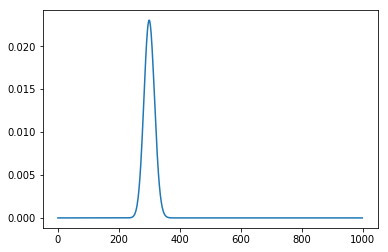

In [115]:
# your code here
from scipy.stats import poisson

N = np.arange(1000)

rv = poisson(300)

arr = []

for n in N:
    arr.append(rv.pmf(n))

plt.plot(arr)